# Deep Dive into the Dow Jones

In [1]:
from primitive import *

In [29]:
index_name = 'dow_jones'
df = get_dow_jones()
dj = df.loc[:, index_name]
dj_ret = dj.pct_change()
dj_log_ret = np.log(dj) - np.log(dj.shift(1))

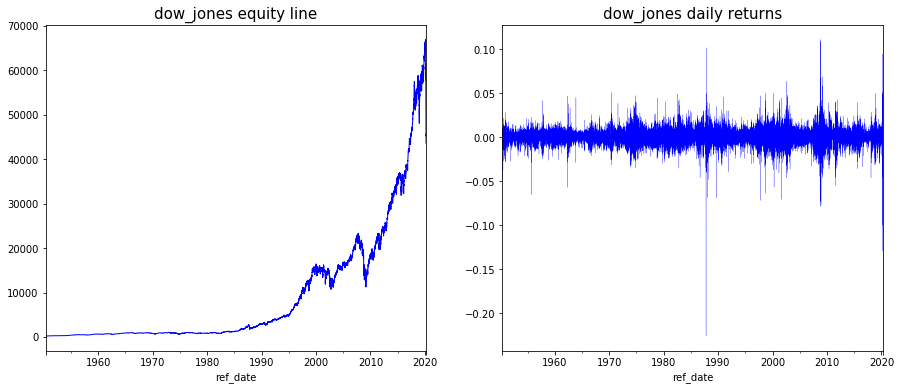

In [32]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title(index_name + ' equity line', fontsize=15)
ax2.set_title(index_name + ' daily returns', fontsize=15)
dj.plot(ax=ax1, color='blue', linewidth=1)
dj_ret.plot(ax=ax2, color='blue', linewidth=0.2)
plt.show()

## Log-log vs semi-log plot

- All equations of the form: $y = a^x$ form a straight lines when plotted semi-logarithmical graph. Taking the log on both sides,

  $$
  \log_{a}(y) = \log_{a}(a^x)
  $$
  
  hence, $\log_{a}(y) = x + \log(c)$; setting $\log(c) = k$, we obtain $\log_{a}(y) = x + k$; then is a linear function of $x$


- Relations of the form $y= x^k$ appear as straight lines in a log–log graph. Taking the log on both sides, 
  
  $$
  \log(y) = \log(x^\alpha)
  $$
  
  hence, $\log(y) = \alpha \log(x)$; setting $\log(y) = Y$ and $\log(x) = X$, we obtain $Y = \alpha X$
  
Then, if plotting the tail of the return distribution on a log log plot resemble a straight line, we can't rule out the possibility hat data come from a power law distribution.

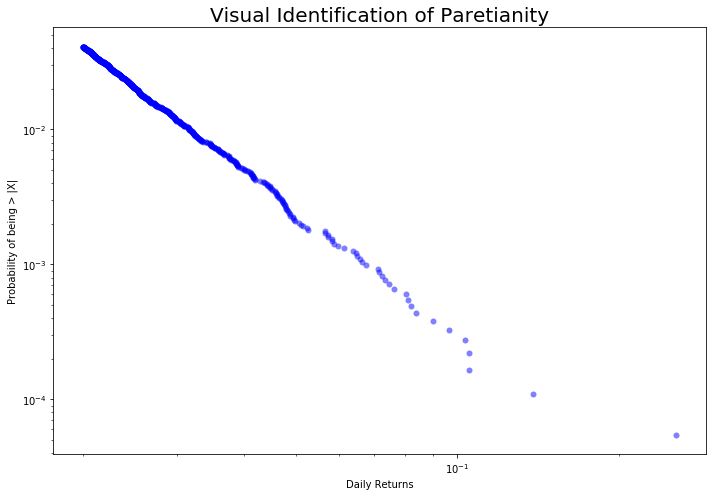

In [9]:
log_log_plot_with_threshold(dj_log_ret, threshold=0.02)

## Kurtosis Analysis

Relying on the non-convergence of moments, let $∥X∥_p$ be the weighted p-norm

$$
||X||_p ≜ (\frac{1}{n} \sum_{i=1}^{n}||x||_p)^\frac{1}{p}
$$

we have the property of power laws $E(Xp) ≮  \infty \Leftrightarrow ∥x∥_p$ is not convergent. First, let's check if the fourth moment of the daily returns are converging.

In [10]:
kurt_original = pd.Series(lagging_kurtosis(dj.reset_index().loc[:, 'dow_jones']))

kurt_dict_reshuffled = {}
for k in range(10):
    dj_reshuffled = reshuffled_ts(dj)
    kurt_dict_reshuffled[k] = lagging_kurtosis(dj_reshuffled)

kurt_reshuffled = pd.DataFrame(kurt_dict_reshuffled).mean(axis=1)

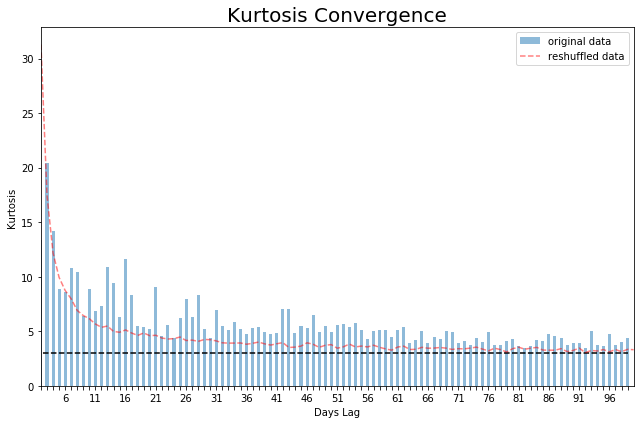

In [16]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
kurt_reshuffled.name = 'reshuffled data'
kurt_original.name = 'original data'
kurt_original.plot(kind='bar', ax=ax, alpha=0.5,  legend=True)
kurt_reshuffled.plot(ax=ax, style='--', alpha=0.5, color='red', legend=True)
ax.hlines(3, ax.get_xticks().min(), ax.get_xticks().max(), linestyle='--', color='black')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)

ax.set_title('Kurtosis Convergence', fontsize=20)
ax.set_xlabel('Days Lag', fontsize=10)
ax.set_ylabel('Kurtosis', fontsize=10)
plt.tight_layout()
plt.show()

If Kurtosis existed, it would end up converging to that of a Gaussian as one lengthens the time window. Visual convergence diagnostics for the kurtosis of the Dow Jones over the past observations. We compute the kurtosis at different lags for the raw and reshuffled data. While the 4th norm is not convergent **(?)** for raw data, it is clearly so for the reshuffled series. We can thus assume that the "fat tailedness" is attributable to the temporal structure of the data, particularly the clustering of its volatility.